In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_17929/1510184450.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Create your connection.
cnx = sqlite3.connect("data/Marketing_DS_task_2.db")

revenue_data = pd.read_sql_query("SELECT * FROM revenue_data", cnx)
spend_data = pd.read_sql_query("SELECT * FROM spend_data", cnx)


In [3]:
spend_data_country_group = (
    spend_data.groupby(
        [
            "platform",
            "country_group",
            "channel",
            "media_type",
            "install_month",
        ]
    )
    .sum("spend")
    .reset_index()
)

In [4]:
spend_revenue_df = pd.merge(
    spend_data_country_group,
    revenue_data,
    how="inner",
    on=["platform", "country_group", "channel", "media_type", "install_month"],
)
spend_revenue_df.sort_values(
    by=[
        "install_month",
        "platform",
        "country_group",
        "channel",
        "media_type",
    ],
    inplace=True,
)
spend_revenue_df.replace("", np.nan, inplace=True)


/tmp/ipykernel_17929/2630639460.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spend_revenue_df.replace("", np.nan, inplace=True)


In [5]:
# Check if 'Revenue' is in column names
for col in spend_revenue_df.columns:
    if "Revenue" in col:
        # Convert 'Revenue' column to float

        spend_revenue_df[col] = spend_revenue_df[col].astype(float)

spend_revenue_df["spend"] = spend_revenue_df["spend"].astype(float)
spend_revenue_df["installs"] = spend_revenue_df["installs"].astype(int)


# Check if 'Revenue' is in column names
for col in spend_revenue_df.columns:
    if "Revenue" in col:
        # Convert 'Revenue' column to float
        period = col.split("_")[0]
        spend_revenue_df[f"{period}_arpi"] = (
            spend_revenue_df[col] / spend_revenue_df["installs"]
        )
        spend_revenue_df.drop(columns=[col], inplace=True)

In [6]:
# mask na values or 0 spend values
spend_revenue_df = spend_revenue_df[
    (spend_revenue_df["installs"] > 0)
    & (spend_revenue_df["spend"] > 0)
    & (spend_revenue_df["D60_arpi"] > 0)
    & (spend_revenue_df["media_type"] != "Demand-Side-Platform")
    # & (spend_revenue_df["D180_Revenue"].notna())
]

spend_revenue_df["cpi"] = spend_revenue_df["spend"] / spend_revenue_df["installs"]

data = spend_revenue_df.copy()

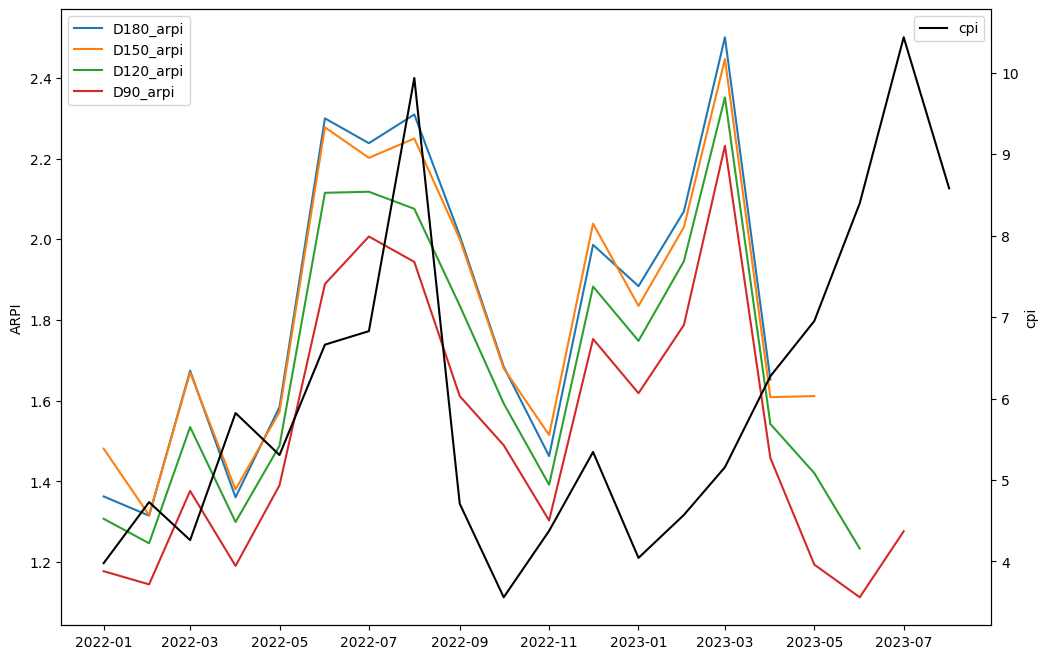

In [7]:

plt.figure(figsize=(12, 8))

ax1 = plt.gca()  # get current axes
ax2 = plt.twinx()

plotting_data_df = data.copy()
plotting_data_df = (
    plotting_data_df[["install_month", "D180_arpi"]]
    .groupby("install_month")
    .mean()
    .reset_index()
)
plotting_data_df["install_month"] = pd.to_datetime(plotting_data_df["install_month"], format="%Y-%m-%d")
ax1.plot(plotting_data_df["install_month"], plotting_data_df["D180_arpi"])

plotting_data_df = data.copy()
plotting_data_df = (
    plotting_data_df[["install_month", "D150_arpi"]]
    .groupby("install_month")
    .mean()
    .reset_index()
)
plotting_data_df["install_month"] = pd.to_datetime(plotting_data_df["install_month"], format="%Y-%m-%d")
ax1.plot(plotting_data_df["install_month"], plotting_data_df["D150_arpi"])

plotting_data_df = data.copy()
plotting_data_df = (
    plotting_data_df[["install_month", "D120_arpi"]]
    .groupby("install_month")
    .mean()
    .reset_index()
)
plotting_data_df["install_month"] = pd.to_datetime(plotting_data_df["install_month"], format="%Y-%m-%d")
ax1.plot(plotting_data_df["install_month"], plotting_data_df["D120_arpi"])

plotting_data_df = data.copy()
plotting_data_df = (
    plotting_data_df[["install_month", "D90_arpi"]].groupby("install_month").mean().reset_index()
)
plotting_data_df["install_month"] = pd.to_datetime(plotting_data_df["install_month"], format="%Y-%m-%d")
ax1.plot(plotting_data_df["install_month"], plotting_data_df["D90_arpi"])

plotting_data_df = data.copy()
plotting_data_df = (
    plotting_data_df[["install_month", "cpi"]].groupby("install_month").mean().reset_index()
)
plotting_data_df["install_month"] = pd.to_datetime(plotting_data_df["install_month"], format="%Y-%m-%d")

ax2.plot(plotting_data_df["install_month"], plotting_data_df["cpi"], color="black")

ax1.set_ylabel("ARPI")
ax2.set_ylabel("cpi")

ax1.legend(["D180_arpi", "D150_arpi", "D120_arpi", "D90_arpi"], loc="upper left")
ax2.legend(["cpi"], loc="upper right")

plt.show()

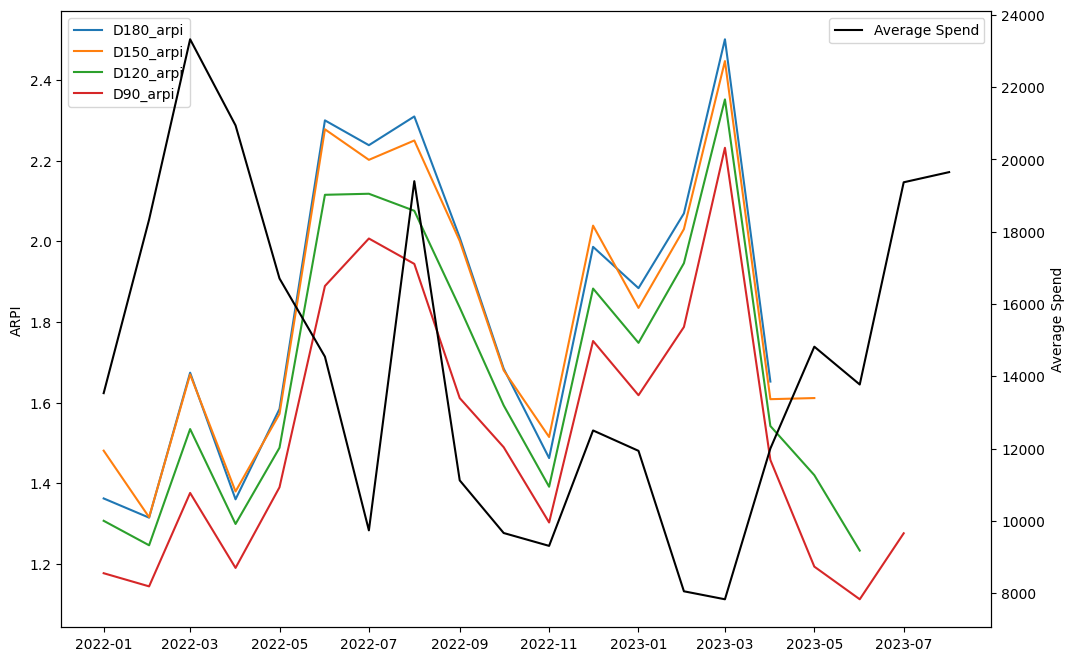

In [10]:

plt.figure(figsize=(12, 8))

ax1 = plt.gca()  # get current axes
ax2 = plt.twinx()

plotting_data_df = data.copy()
plotting_data_df = (
    plotting_data_df[["install_month", "D180_arpi"]]
    .groupby("install_month")
    .mean()
    .reset_index()
)
plotting_data_df["install_month"] = pd.to_datetime(plotting_data_df["install_month"], format="%Y-%m-%d")
ax1.plot(plotting_data_df["install_month"], plotting_data_df["D180_arpi"])

plotting_data_df = data.copy()
plotting_data_df = (
    plotting_data_df[["install_month", "D150_arpi"]]
    .groupby("install_month")
    .mean()
    .reset_index()
)
plotting_data_df["install_month"] = pd.to_datetime(plotting_data_df["install_month"], format="%Y-%m-%d")
ax1.plot(plotting_data_df["install_month"], plotting_data_df["D150_arpi"])

plotting_data_df = data.copy()
plotting_data_df = (
    plotting_data_df[["install_month", "D120_arpi"]]
    .groupby("install_month")
    .mean()
    .reset_index()
)
plotting_data_df["install_month"] = pd.to_datetime(plotting_data_df["install_month"], format="%Y-%m-%d")
ax1.plot(plotting_data_df["install_month"], plotting_data_df["D120_arpi"])

plotting_data_df = data.copy()
plotting_data_df = (
    plotting_data_df[["install_month", "D90_arpi"]].groupby("install_month").mean().reset_index()
)
plotting_data_df["install_month"] = pd.to_datetime(plotting_data_df["install_month"], format="%Y-%m-%d")
ax1.plot(plotting_data_df["install_month"], plotting_data_df["D90_arpi"])

plotting_data_df = data.copy()
plotting_data_df = (
    plotting_data_df[["install_month", "spend"]].groupby("install_month").mean().reset_index()
)
plotting_data_df["install_month"] = pd.to_datetime(plotting_data_df["install_month"], format="%Y-%m-%d")

ax2.plot(plotting_data_df["install_month"], plotting_data_df["spend"], color="black")

ax1.set_ylabel("ARPI")
ax2.set_ylabel("Average Spend")

ax1.legend(["D180_arpi", "D150_arpi", "D120_arpi", "D90_arpi"], loc="upper left")
ax2.legend(["Average Spend"], loc="upper right")

plt.show()